# Getting started 
I will assume that since this is open you at the very least have anaconda installed... and from this you will have some modules called numpy, matplotlib, and scipy, installed 
Now when you run any of the code lines bellow you will need to select a python enviroment to run it in the command

## Using a package
Even though these modules are installed they won't be inside your enviorment (the memory used for executing code)
To bring them into your enviroment you will need to import them
Lets start off by importing two of the most important modules and exploring what they can do for us.

In [1]:
%matplotlib widget
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.constants as c 
import scipy.special as s


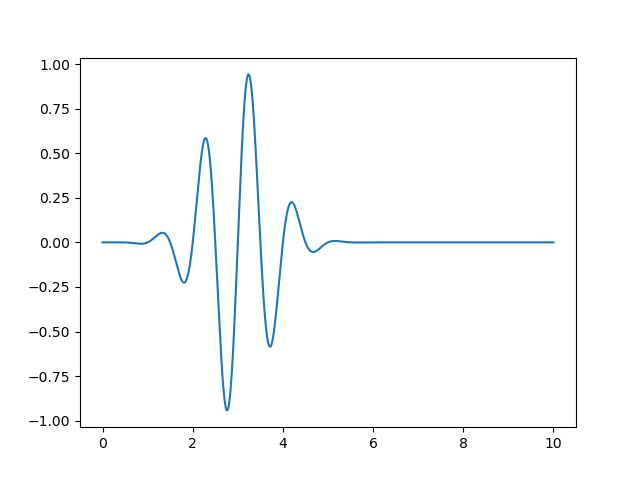

In [2]:
x = np.linspace(0,10,1000)
y = np.sin(np.pi*2*x/1)*np.exp(-(x-3)**2)
plt.plot(x,y)
plt.show()

The `as` command just gives the module an alias thats quicker to type. 
The precentage sign `%` is used to change notebook settings, in this case it forces the matplotlib package to operate in an interactive mode 
## Numpy 
or numerical python is a package that handles matrices and numerical calculations in python
The `linspace()` command is a function in numpy that jenerates a set of values linearly spaced from a minumum (0) to a maximum (10) in N steps(1000)
Other common functions are also included in numpy such as `sin()`, `cos()`, `exp()`
## matplotlib 
is a package that allows you to plot figures and handle generating videos 
The `plot` command will draw something on a new figure 
The `show` command just forces this figure to be drawn

## Example 1 
To get ourselves used to this lets start off by 
recreating some of the figures in Bruus's book...
#### Figure 1.1c (probability densities) for hydrogen atom

In [3]:
a0 = c.value('Bohr radius') # define the Bohr radius

def a(k,l,n):
    #define the recursion formula for the radial equation 
    ak = a0
    for beta in range(k):
        ak *= (beta+l+1-n)/((beta+1)*(k+2*l+2))
    return  ak 

def rho(r,n,Z):
    #reduced Coordinate for r
    return 2*r*Z/(n*a0)

def coulomb_funct(r,n,l,Z):
    #define the radial component of the wavefunction 
    R = 0
    rh=rho(r,n,Z)
    for k in range(n-l-1):
        R += rh**l*a(k,l,n)*rh**k*np.exp(-rh/2)
    return R


The keyword `def` is used here to define a function. Whenever we want to use a function in python our first instinct should be to look for it online to see if anyone has done the hard work for us in this case there wasn't something ready and reliable available so I built something out 

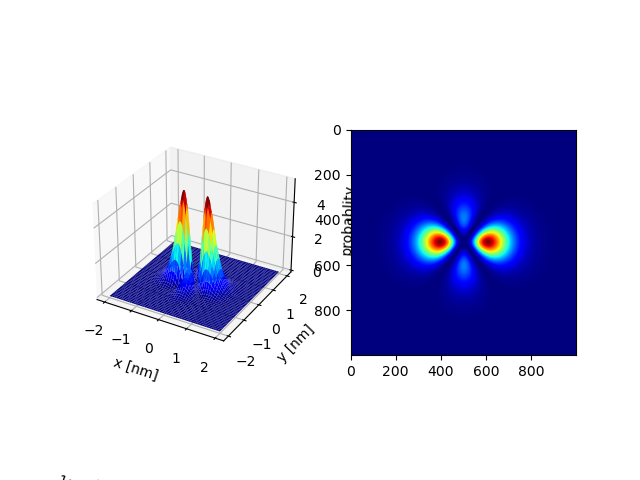

In [9]:
n = 4
l = 2
m = 0
#generate x y coordinate space 
x = np.linspace(-2e-9,2e-9,1000)
y = np.linspace(-2e-9,2e-9,1000)
#generate meshgrid overlay for that coordinate space 
X,Y = np.meshgrid(x,y)

#create 
fig =plt.figure()
ax1 = fig.add_subplot(1,2,1,projection = '3d')
ax2 = fig.add_subplot(1,2,2)
r= np.sqrt(X**2+Y**2)
th = 0*X
phi = np.sign(Y)*np.arccos(X/r)
rphiHy = coulomb_funct(r,n,l,1)*s.sph_harm(m,l,th,phi)
prob = np.abs(rphiHy)**2
ax1.plot_surface(X,Y,prob,cmap='jet')
ax1.set_xlabel('x [nm]')
ax1.set_ylabel('y [nm]')
ax1.set_zlabel('probablity')
ax2.imshow(prob,cmap='jet')


This set of cells show some alternative plotting techniques, using subplots to allow for 3d plots. 
Now lets explore another slightly more difficult method: 

#### Figure 1.2b (probability densities) for helium atom
To make this a little easier lets first generate a definintion for the 

In [8]:
def psi(r,th,phi,n,l,m,Z):
    return coulomb_funct(r,n,l,Z)*s.sph_harm(m,l,th,phi)
def prob(r2,r1,th1,th2,phi1,phi2,n1,n2,l1,l2,m1,m2,Z):
    return 1/2*np.abs(psi(r1,th))**2
